In [1]:
import pandas, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [3]:
input_file = 'supplemetary_information_table_SIT2.DETs.xlsx'

In [4]:
df_up = pandas.read_excel(input_file, sheet_name='5 uM | 4 h | up', index_col=0)
df_up.head()

,Gene name,Biotype,Description,Base mean,log2FC,P value,Adjusted P-value,Reference expression (TPM),Sample expression (TPM),Discrete abs(log2FC)
ENSEMBL,,,,,,,,,,
ENSG00000258504,RP11-638I2.6,lincRNA,NaN,26.0145,8.0825,0.000007,0.00338,0.0,2.4715,1.5850
ENSG00000228294,BMS1P17,transcribed_unprocessed_pseudogene,BMS1 pseudogene 17,24.3383,7.8918,0.000103,0.03560,0.0,6.0061,2.8074
ENSG00000252948,RNU6-1314P,snRNA,NaN,16.6484,7.3430,0.000323,0.09160,0.0,3.6135,2.3219
ENSG00000259109,RP4-687K1.2,processed_pseudogene,NaN,16.2737,7.3119,0.000347,0.09730,0.0,3.5709,2.3219
ENSG00000273077,RP11-130C6.1,lincRNA,NaN,28.7883,7.2419,0.000029,0.01210,0.0,5.1682,2.5850


In [5]:
df_down = pandas.read_excel(input_file, sheet_name='5 uM | 4 h | down', index_col=0)
df_down.head()

,Gene name,Biotype,Description,Base mean,log2FC,P value,Adjusted P-value,Reference expression (TPM),Sample expression (TPM),Discrete abs(log2FC)
ENSEMBL,,,,,,,,,,
ENSG00000257767,RP11-162P23.2,protein_coding,NaN,144.1358,-10.7369,4.080000e-13,7.520000e-10,2.0513,0.0000,1.5850
ENSG00000259952,AC009133.15,antisense,NaN,68.0389,-9.6879,9.800000e-11,1.030000e-07,2.6507,0.0000,2.0000
ENSG00000260570,RP11-24N18.1,antisense,NaN,49.0677,-6.5563,3.800000e-05,1.520000e-02,8.6386,0.0000,3.3219
ENSG00000138685,FGF2,protein_coding,fibroblast growth factor 2,1795.5069,-4.5152,2.120000e-04,6.780000e-02,3.5309,0.0551,2.3219
ENSG00000263238,CTSO,protein_coding,cathepsin O,1050.8911,-3.9642,6.380000e-13,1.010000e-09,5.3474,0.3413,2.5850


In [6]:
xu = df_up['log2FC']
xd = df_down['log2FC']
yu = -numpy.log10(df_up['Adjusted P-value'])
yd = -numpy.log10(df_down['Adjusted P-value'])

In [7]:
yu[yu > 20] = 20
xu[xu > 5] = 5
xd[xd < -5] = -5

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_2967/1871398905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xu[xu > 5] = 5
/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_2967/1871398905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd[xd < -5] = -5


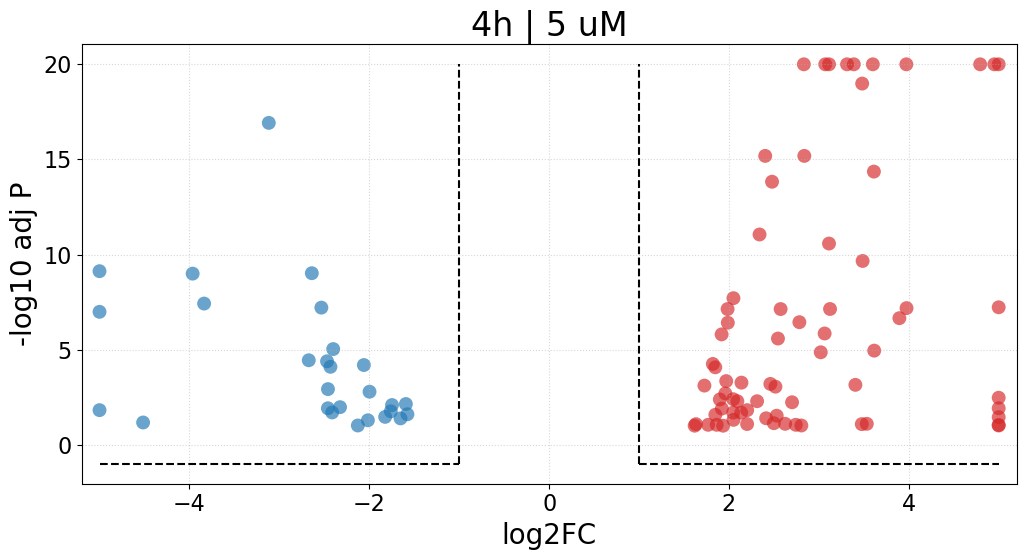

In [8]:
matplotlib.pyplot.scatter(xu, yu, color='tab:red', s=100, alpha=2/3, edgecolors='none')
matplotlib.pyplot.scatter(xd, yd, color='tab:blue', s=100, alpha=2/3, edgecolors='none')

matplotlib.pyplot.plot([-1, -1], [numpy.log10(0.1), 20], color='black', ls='--')
matplotlib.pyplot.plot([1, 1], [numpy.log10(0.1), 20], color='black', ls='--')
matplotlib.pyplot.plot([-5, -1], [numpy.log10(0.1), numpy.log10(0.1)], color='black', ls='--')
matplotlib.pyplot.plot([1, 5], [numpy.log10(0.1), numpy.log10(0.1)], color='black', ls='--')

matplotlib.pyplot.xlabel('log2FC')
matplotlib.pyplot.ylabel('-log10 adj P')
matplotlib.pyplot.xlim([-5.2, 5.2])
matplotlib.pyplot.title('4h | 5 uM')
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('five_four.svg')